In [3]:
import pandas as pd
import numpy as np
import scanpy as sc

In [4]:
import os

def find_directories(base_dir, match_str):
    matched_dirs = []
    for root, dirs, files in os.walk(base_dir):
        for dir_name in dirs:
            if dir_name.startswith(match_str):
                matched_dirs.append(os.path.join(root, dir_name))
    return matched_dirs

# Example usage
base_directory = '/hpc/home/ps325/projects/velorama/results/'  # Replace with your base directory path
string_to_match = '78'  # Replace with the string you want to match
folder = []
matched_directories = find_directories(base_directory, 'run' + string_to_match)
for dir_path in matched_directories:
    folder.append(dir_path)
    print(dir_path)

/hpc/home/ps325/projects/velorama/results/run78_cerebellum_A_nl-50_flip-false_schedule-true_decay-0.95


In [5]:
def load_interaction_scores(dir_path):
    ints_file_path = dir_path +'/velorama_run.dag_precomputed.velorama.interactions.tsv'
    ints = pd.read_csv(ints_file_path, sep='\t')

    ints.rename(columns={'Unnamed: 0': 'Genes'}, inplace=True)

    ints = ints.set_index('Genes')
    return ints
ints = load_interaction_scores(folder[0])
ints.head()

print(ints.shape)

(1225, 78)


In [6]:
import matplotlib.pyplot as plt

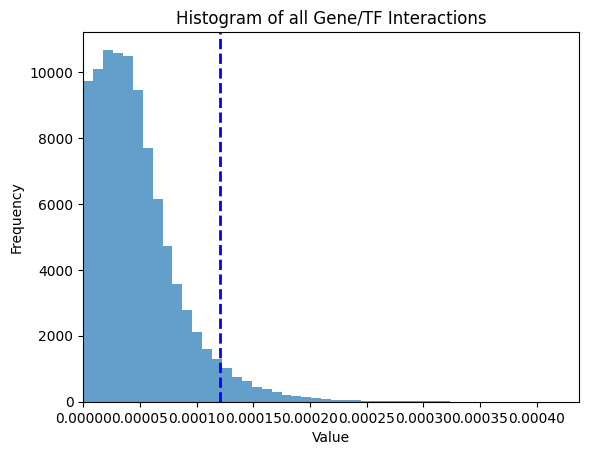

In [7]:
import matplotlib.pyplot as plt

percentile = 95

# Assuming 'ints' is your DataFrame
overall_percentile = np.percentile(ints.values, percentile)

# Assuming int_list and overall_percentile are already defined
int_list = ints.values.flatten().tolist()

# Plot histogram with smaller bins and limited x-axis range
plt.hist(int_list, bins=50, alpha=0.7)  # Increased the number of bins to 30
plt.axvline(overall_percentile, color='b', linestyle='--', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of all Gene/TF Interactions')

# Set the x-axis range

plt.xlim(min(int_list), max(int_list))  # Adjust the range as needed
#plt.ylim(0, 600)


plt.show()


In [8]:
lags_file_path = folder[0] +'/velorama_run.dag_precomputed.velorama.lags.tsv'
lags = pd.read_csv(lags_file_path, sep='\t')
lags = lags.drop(columns=[lags.columns[0]])
lags.head()

,Adarb1,Bcl6,Celf4,Chd2,Ckmt1,Ctcf,Cux1,Cxxc5,Dnmt3a,Dusp26,...,Uqcrb,Ywhae,Zbtb18,Zbtb20,Zbtb4,Zeb2,Zfp467,Zfp521,Zic1,Zmiz1
0,1.846005,1.782228,2.583160,1.772178,1.759077,1.907033,1.789944,1.835838,1.784769,1.813331,...,2.411249,2.382807,1.826379,1.874350,1.662578,1.181538,1.773245,1.712424,3.152475,1.791594
1,1.758158,1.671500,2.382582,1.721842,1.639684,1.687911,1.647249,1.690026,1.684040,1.591156,...,2.068468,2.268345,1.712445,1.665436,1.604341,1.172840,1.759233,1.817403,2.751114,1.755120
2,1.716229,1.656846,2.195169,1.706186,1.645339,1.664478,1.700924,1.676079,1.668368,1.653562,...,2.170652,2.330794,1.701318,1.727400,1.625342,1.175391,1.767964,1.696400,3.045786,1.856834
3,1.743095,1.685038,2.266404,1.644713,1.759588,1.788642,1.686955,1.704382,1.655861,1.772235,...,2.416412,2.352125,1.770009,1.713679,1.645932,1.183073,1.718568,1.737244,2.589708,1.716279
4,1.613689,1.760852,2.376237,1.707173,1.596941,1.789540,1.880009,1.757390,1.640799,1.620785,...,2.087964,2.157205,1.739725,1.780364,1.737205,1.174960,1.700581,1.795544,3.365007,1.739858


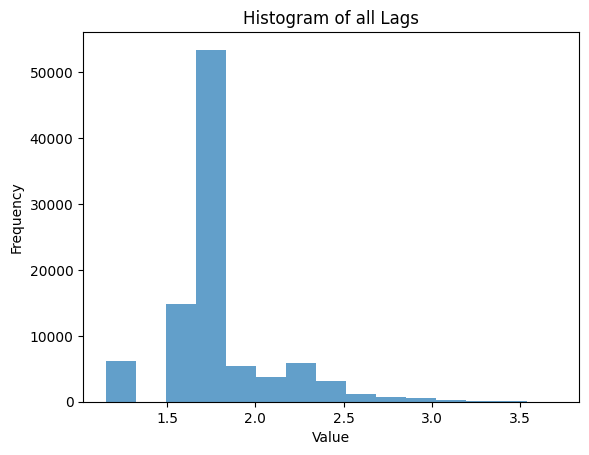

In [9]:
lag_list = lags.values.flatten().tolist()
# Plot histogram
plt.hist(lag_list, bins=15, alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of all Lags')
plt.show()

In [25]:
import numpy as np
import pandas as pd

# Find values in the DataFrame that are above the overall 95th percentile


def tf_gene_pairs(ints, percentile = 95, details = False):
    tf_counts = {}
    overall_percentile = np.percentile(ints.values, percentile)
    above_percentile = ints[ints > overall_percentile]
    # Collect the genes and TFs with values above the 95th percentile
    for gene in above_percentile.index:
        for TF in above_percentile.columns:
            if not pd.isna(above_percentile.loc[gene, TF]):
                if TF in tf_counts:
                    tf_counts[TF] += 1
                else:
                    tf_counts[TF] = 1

    # Sort the TFs by count in descending order
    sorted_tf_counts = sorted(tf_counts.items(), key=lambda item: item[1], reverse=True)

    # Print the unique TFs as a sentence list with frequency counts
    unique_TFs_list = ', '.join([f"{TF} ({count})" for TF, count in sorted_tf_counts])
    print(f"Unique Ligands in the {percentile}th percentile range: {unique_TFs_list}")
    if details:

        print(f"Overall {percentile}th percentile:", f"{overall_percentile:.4e}")

        print(f"\nValues above the {percentile}th percentile:")

    # Display the genes and TFs with values above the 95th percentile

        for gene in above_percentile.index:
            for TF in above_percentile.columns:
                if not pd.isna(above_percentile.loc[gene, TF]):
                    value = above_percentile.loc[gene, TF]
                    print(f"Gene: {gene}, TF: {TF} | {value:.4e}")
tf_gene_pairs(ints, 95, True)

Unique Ligands in the 95th percentile range: Id4 (1013), Zic1 (728), Celf4 (684), Ywhae (510), Smarcc2 (383), Etv1 (250), Uqcrb (208), Gpd1 (168), Tcf4 (153), Id2 (121), Hspa5 (117), Prnp (105), Bcl6 (85), Gtf2i (54), Rora (32), Neurod1 (26), Rab18 (24), Zbtb18 (19), Ctcf (16), Ubxn1 (14), Neurod2 (12), Ncald (10), Setbp1 (10), Etfb (7), Phf20 (7), En2 (6), Smap2 (4), Rad21 (3), Git2 (2), Rufy3 (2), Tsnax (1), Hivep2 (1), Dnmt3a (1), Zfp521 (1), Adarb1 (1)
Overall 95th percentile: 1.2090e-04

Values above the 95th percentile:
Gene: 1500009C09Rik, TF: Id4 | 1.2282e-04
Gene: 1700020I14Rik, TF: Id4 | 1.6934e-04
Gene: 1700020I14Rik, TF: Zic1 | 1.4991e-04
Gene: 1700025G04Rik, TF: Celf4 | 1.5921e-04
Gene: 1700025G04Rik, TF: Id4 | 1.5667e-04
Gene: 1700025G04Rik, TF: Smarcc2 | 1.4538e-04
Gene: 1700025G04Rik, TF: Tcf4 | 1.2795e-04
Gene: 1700025G04Rik, TF: Ywhae | 1.4531e-04
Gene: 2010111I01Rik, TF: Celf4 | 2.1455e-04
Gene: 2010111I01Rik, TF: Ctcf | 1.2360e-04
Gene: 2010111I01Rik, TF: Gpd1 | 1.3

/hpc/home/ps325/projects/velorama/results/run78_cerebellum_A_nl-50_flip-false_schedule-true_decay-0.95/velorama_run.seed0.h32.H.lag5.dag_precomputed
Lowest Loss: 7.31786e-01


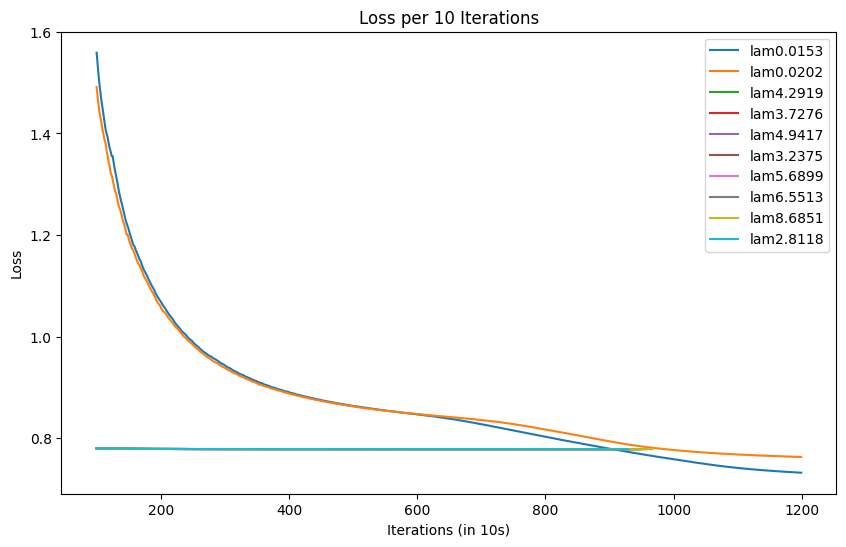

In [11]:
import os
import json
import matplotlib.pyplot as plt

def read_json_files(folder_path):
    losses = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            with open(os.path.join(folder_path, filename), 'r') as file:
                data = json.load(file)
                if isinstance(data, list):
                    losses.append(data)
                    legend_label = filename.split('_')[-1].replace('.json', '')
                    filenames.append(legend_label)
    return losses, filenames

def plot_losses(losses, filenames, start):
    plt.figure(figsize=(10, 6))
    for i, (loss, label) in enumerate(zip(losses, filenames)):
        plt.plot(range(start, len(loss)), loss[start:], label=label)  # Exclude the first iteration and adjust x-axis
    plt.xlabel('Iterations (in 10s)')
    plt.ylabel('Loss')
    plt.title('Loss per 10 Iterations')
    plt.legend()
    plt.show()

def get_files_with_lowest_final_losses(losses, filenames, n=10):
    final_losses = [(loss[-1], i) for i, loss in enumerate(losses)]
    final_losses.sort()
    lowest_indices = [i for _, i in final_losses[:n]]
    lowest_losses = [losses[i] for i in lowest_indices]
    lowest_filenames = [filenames[i] for i in lowest_indices]
    return lowest_losses, lowest_filenames

def get_lowest_loss_overall(losses):
    lowest_loss = float('inf')
    for loss in losses:
        min_loss = min(loss)
        if min_loss < lowest_loss:
            lowest_loss = min_loss
    return lowest_loss

folder_path = f'{dir_path}/velorama_run.seed0.h32.H.lag5.dag_precomputed'
print(folder_path)
losses, filenames = read_json_files(folder_path)
lowest_losses, lowest_filenames = get_files_with_lowest_final_losses(losses, filenames)
lowest_loss_overall = get_lowest_loss_overall(losses)
print(f"Lowest Loss: {lowest_loss_overall:.5e}")
plot_losses(lowest_losses, lowest_filenames, 100)


['/hpc/home/ps325/projects/velorama/results/run62_cerebellum_consc_l1_flip-false_decay-95'] ['/hpc/home/ps325/projects/velorama/results/run65_cerebellum_consc_l1_flip-true_decay-95']


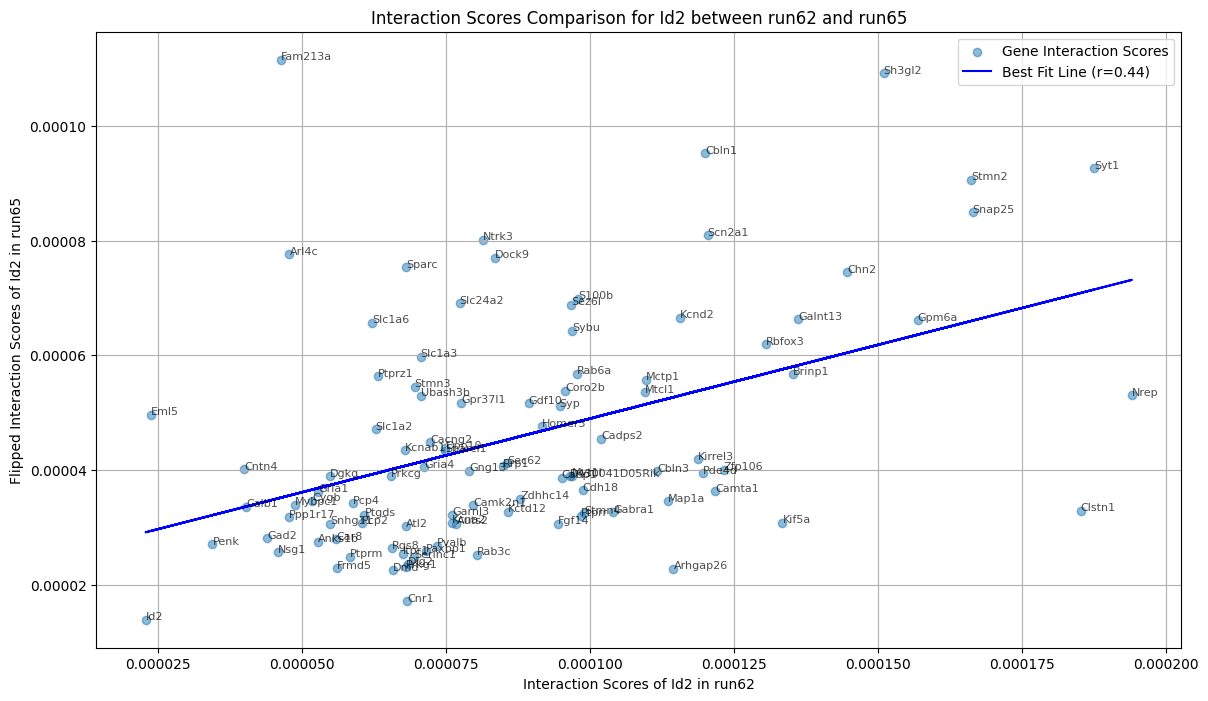

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


def int_flip_plot(base_directory, run1, run2, TF, stats = False, label = False):
    # Find directories for both runs
    dir1 = find_directories(base_directory, run1)
    dir2 = find_directories(base_directory, run2)
    print(dir1, dir2)
    
    # Identify the "flip-true" directory
    flip_dir1 = next((d for d in dir1 if 'flip-true' in d), None)
    flip_dir2 = next((d for d in dir2 if 'flip-true' in d), None)
    
    # Determine which directory contains "flip-true"
    if flip_dir1:
        flip_dir = flip_dir1
        non_flip_dir = dir2[0]
        x_label = f'Interaction Scores of {TF} in {run2}'
        y_label = f'Flipped Interaction Scores of {TF} in {run1}'
    elif flip_dir2:
        flip_dir = flip_dir2
        non_flip_dir = dir1[0]
        x_label = f'Interaction Scores of {TF} in {run1}'
        y_label = f'Flipped Interaction Scores of {TF} in {run2}'
    else:
        raise ValueError("No flip-true directory found in either run.")
    
    # Load interaction scores for both runs
    int_scores_flip = load_interaction_scores(flip_dir)
    int_scores_non_flip = load_interaction_scores(non_flip_dir)
    
    # Ensure the data is aligned by gene names
    common_genes = int_scores_flip.index.intersection(int_scores_non_flip.index)
    tf_scores_flip = int_scores_flip.loc[common_genes, TF]
    tf_scores_non_flip = int_scores_non_flip.loc[common_genes, TF]
    
    # Print gene and interaction scores
    if stats:
        for gene in common_genes:
            print(f"Gene: {gene}, {non_flip_dir} Score: {tf_scores_non_flip[gene]}, {flip_dir} Score: {tf_scores_flip[gene]}")
    
    # Create a scatter plot
    plt.figure(figsize=(14, 8))
    plt.scatter(tf_scores_non_flip, tf_scores_flip, alpha=0.5, label='Gene Interaction Scores')
    
    # Add labels for each gene
    if label:
        for gene in common_genes:
            plt.annotate(gene, (tf_scores_non_flip[gene], tf_scores_flip[gene]), fontsize=8, alpha=0.7)
    
    # Calculate the line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(tf_scores_non_flip, tf_scores_flip)
    line = slope * tf_scores_non_flip + intercept
    plt.plot(tf_scores_non_flip, line, color='blue', label=f'Best Fit Line (r={r_value:.2f})')
    
    # Add correlation coefficient to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Interaction Scores Comparison for {TF} between {run1} and {run2}')
    plt.legend()
    plt.grid(True)
    plt.show()


int_flip_plot(base_directory, 'run62', 'run65', 'Id2', label=True)